In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('crop_production.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
states = list(df['State_Name'].unique())


# some states are missing - why?
## Delhi:

Urbanization: Delhi is a highly urbanized city-state with minimal agricultural activities. Its economy is predominantly service-based with a focus on commerce, finance, and government services.

## Lakshadweep:

Geography: Lakshadweep is an archipelago with very limited land area suitable for agriculture. The islands are known more for their marine resources and tourism rather than agriculture.

## Ladakh:

Climate and Terrain: Ladakh has an extremely harsh climate and rugged terrain, making large-scale agriculture challenging. The region has limited agricultural activities due to its high altitude and arid conditions



In [5]:
states

['Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Chandigarh',
 'Chhattisgarh',
 'Dadra and Nagar Haveli',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir ',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana ',
 'Tripura',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal']

# Points to Note:
# kharif and autum
## Dataset mentions autumn and kharif seperately
## Kharif means "autumn" in Arabic.
## but agriculure reference says - 
    kharif - June and end in October
    autumn - September, October, November
    so lets consider them different 

## gemini solved my confusion - 
    Kharif: This word comes from Arabic and literally translates to "autumn." However, in the context of agriculture in India and some other South Asian countries, it refers to the monsoon season for planting crops.

    Monsoon: This word is used in English and many other languages to describe seasonal winds that bring rain. In India, the monsoon season coincides with the Kharif season (roughly June to September).

# summer / Zaid
## summer agriculture season -
    Zaid or Summer cropping season runs from March to June


# rabi / winter
    these two overlaps
    Rabi-Season: Winter (October to March)
    Winter-Season: Overlaps with Rabi (November to February)

In [6]:
seasons = list(df['Season'].unique())
seasons

['Kharif     ',
 'Whole Year ',
 'Autumn     ',
 'Rabi       ',
 'Summer     ',
 'Winter     ']

## We have 16 years of data

In [7]:
years = list(df['Crop_Year'].unique())

In [8]:
years

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2010,
 1997,
 1998,
 1999,
 2007,
 2008,
 2009,
 2011,
 2012,
 2013,
 2014,
 2015]

# 124 differnt crops are there in dataset

## but actually -
Between 500 and 1000

This range considers the following factors:

Major Crop Categories: As mentioned earlier, there are several major categories like food grains, pulses, oilseeds, fruits, vegetables, spices, and plantation crops. Each category itself holds a substantial number of crops.
Regional Variations: While some crops are widespread, many are specific to certain regions due to climate or soil conditions. Accounting for these variations adds to the total number.
Varietal Differences: Within many crops, there can be numerous varieties with slight differences. Including these variations increases the overall count


# govenment gives  MSP on these crops
## Kharif Crops (14):

Paddy
Jowar (Sorghum)
Bajra (Pearl millet)
Tur (Arhar)
Moong (Green gram)
Urad (Black gram)
Groundnut
Cotton
Soyabean
Sunflower seed
Sesamum
Nigerseed
Hempseed
Kuttu (Buckwheat)

## Rabi Crops (6):

Wheat
Barley
Gram (Chickpea)
Masur (Lentil)
Rapeseed & Mustard
Safflower
Other Commercial Crops (2):

## Sugarcane
Copra (dried coconut kernel)

# so possible that production of msp products is higher 

In [9]:
crop = list(df['Crop'].unique())


In [10]:
len(crop)

124

In [11]:
crop

['Arecanut',
 'Other Kharif pulses',
 'Rice',
 'Banana',
 'Cashewnut',
 'Coconut ',
 'Dry ginger',
 'Sugarcane',
 'Sweet potato',
 'Tapioca',
 'Black pepper',
 'Dry chillies',
 'other oilseeds',
 'Turmeric',
 'Maize',
 'Moong(Green Gram)',
 'Urad',
 'Arhar/Tur',
 'Groundnut',
 'Sunflower',
 'Bajra',
 'Castor seed',
 'Cotton(lint)',
 'Horse-gram',
 'Jowar',
 'Korra',
 'Ragi',
 'Tobacco',
 'Gram',
 'Wheat',
 'Masoor',
 'Sesamum',
 'Linseed',
 'Safflower',
 'Onion',
 'other misc. pulses',
 'Samai',
 'Small millets',
 'Coriander',
 'Potato',
 'Other  Rabi pulses',
 'Soyabean',
 'Beans & Mutter(Vegetable)',
 'Bhindi',
 'Brinjal',
 'Citrus Fruit',
 'Cucumber',
 'Grapes',
 'Mango',
 'Orange',
 'other fibres',
 'Other Fresh Fruits',
 'Other Vegetables',
 'Papaya',
 'Pome Fruit',
 'Tomato',
 'Rapeseed &Mustard',
 'Mesta',
 'Cowpea(Lobia)',
 'Lemon',
 'Pome Granet',
 'Sapota',
 'Cabbage',
 'Peas  (vegetable)',
 'Niger seed',
 'Bottle Gourd',
 'Sannhamp',
 'Varagu',
 'Garlic',
 'Ginger',
 'Oilsee

# area and production
## area and production units are not mentioned anywhere so we can not do comparison between the crops

In [17]:
df['Area'].max()

8580100.0

In [18]:
df['Area'].min()

0.04

In [20]:
df.Area.value_counts()

1.0         4553
2.0         3453
100.0       2824
3.0         2636
4.0         2273
            ... 
21521.0        1
21261.0        1
249741.0       1
245200.0       1
279151.0       1
Name: Area, Length: 38442, dtype: int64

# we can deep dive into visualization now

## kharif and Rabi are important seasons 

In [28]:
distinct_crops_in_season_list = []
for x in seasons:
    distinct_crops_in_season_list.append(len(df[df['Season']==x]['Crop'].unique()))
    
    

In [30]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Distinct Crops', x=seasons, y=distinct_crops_in_season_list)
])


fig.update_layout(
    title='Number of Distinct Crops in Each Season',
    xaxis_title='Season',
    yaxis_title='Number of Distinct Crops',
    barmode='group'
)


fig.show()

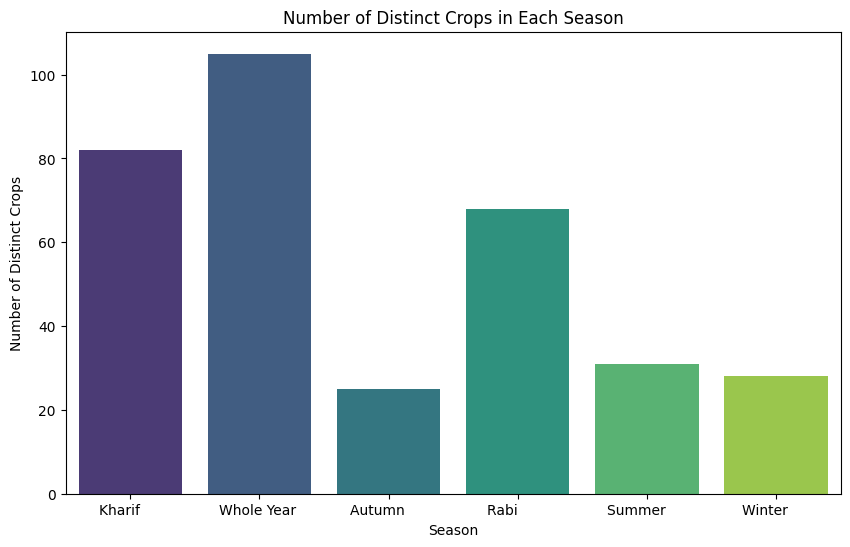

In [31]:
# just doing this because i want to submit this some where and they want graphs in seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = pd.DataFrame({
    'Season': seasons,
    'Distinct Crops': distinct_crops_in_season_list
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Distinct Crops', data=data, palette='viridis')

# Add titles and labels
plt.title('Number of Distinct Crops in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Distinct Crops')

# Show the plot
plt.show()

## now let analyse crop wise data 
## there are 124 crops mentioned in data set
## rice is a crop that grow in every state
## fact found on google - Almost all parts of India are suitable for raising rice during the summer season provided that water is available. 

In [32]:
# now let analyse crop wise data 
# there are 124 crops mentioned in data set
# rice is a crop that grow in every state
# fact found on google - Almost all parts of India are suitable for raising rice during the summer season provided that water is available. 
crop

['Arecanut',
 'Other Kharif pulses',
 'Rice',
 'Banana',
 'Cashewnut',
 'Coconut ',
 'Dry ginger',
 'Sugarcane',
 'Sweet potato',
 'Tapioca',
 'Black pepper',
 'Dry chillies',
 'other oilseeds',
 'Turmeric',
 'Maize',
 'Moong(Green Gram)',
 'Urad',
 'Arhar/Tur',
 'Groundnut',
 'Sunflower',
 'Bajra',
 'Castor seed',
 'Cotton(lint)',
 'Horse-gram',
 'Jowar',
 'Korra',
 'Ragi',
 'Tobacco',
 'Gram',
 'Wheat',
 'Masoor',
 'Sesamum',
 'Linseed',
 'Safflower',
 'Onion',
 'other misc. pulses',
 'Samai',
 'Small millets',
 'Coriander',
 'Potato',
 'Other  Rabi pulses',
 'Soyabean',
 'Beans & Mutter(Vegetable)',
 'Bhindi',
 'Brinjal',
 'Citrus Fruit',
 'Cucumber',
 'Grapes',
 'Mango',
 'Orange',
 'other fibres',
 'Other Fresh Fruits',
 'Other Vegetables',
 'Papaya',
 'Pome Fruit',
 'Tomato',
 'Rapeseed &Mustard',
 'Mesta',
 'Cowpea(Lobia)',
 'Lemon',
 'Pome Granet',
 'Sapota',
 'Cabbage',
 'Peas  (vegetable)',
 'Niger seed',
 'Bottle Gourd',
 'Sannhamp',
 'Varagu',
 'Garlic',
 'Ginger',
 'Oilsee

In [38]:
# lets figure out which crop grows in most of the states
df[df['Crop'] == 'Wheat']['State_Name'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [39]:
total_states_for_each_crop = []
for x in crop:
    total_states_for_each_crop.append(len(df[df['Crop'] == x]['State_Name'].unique()))
    
    

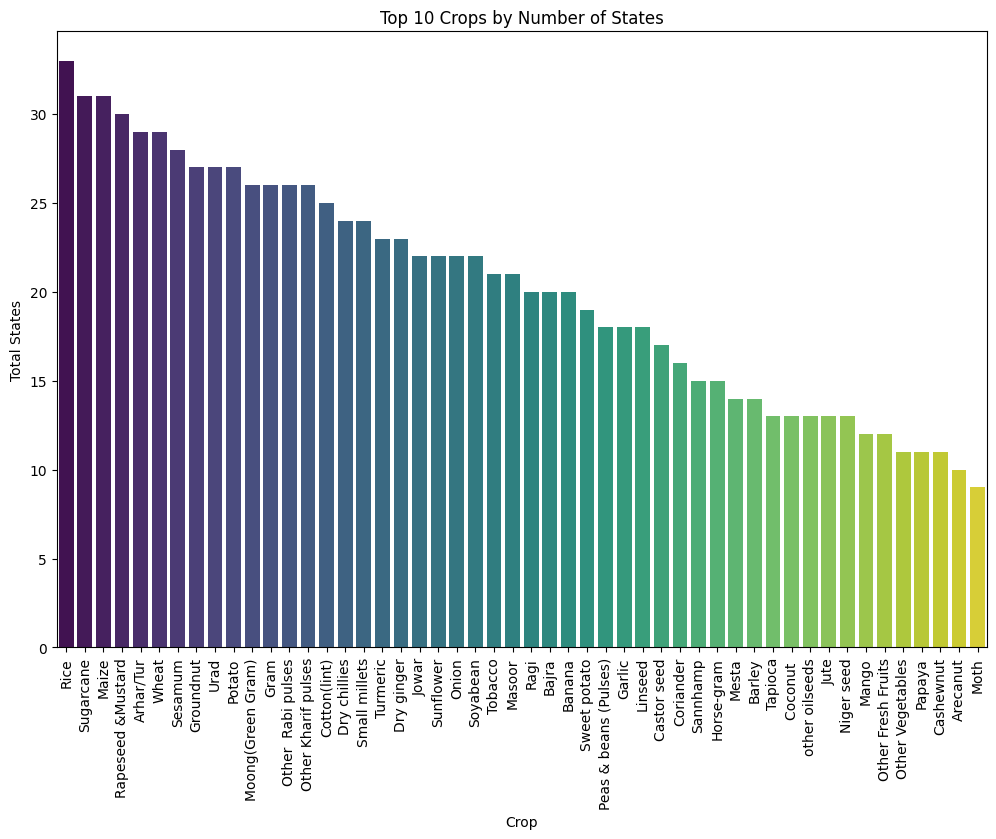

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


crop = df['Crop'].unique()
total_states_for_each_crop = [len(df[df['Crop'] == x]['State_Name'].unique()) for x in crop]

data = pd.DataFrame({
    'Crop': crop,
    'Total States': total_states_for_each_crop
})

top_10_data = data.sort_values(by='Total States', ascending=False).head(50)

plt.figure(figsize=(12, 8))
sns.barplot(x='Crop', y='Total States', data=top_10_data, palette='viridis')


plt.title('Crops by Number of States')
plt.xlabel('Crop')
plt.ylabel('Total States')
plt.xticks(rotation = 90)

plt.show()


In [64]:
import plotly.graph_objects as go
import pandas as pd

crop = df['Crop'].unique()
total_states_for_each_crop = [len(df[df['Crop'] == x]['State_Name'].unique()) for x in crop]


data = pd.DataFrame({
    'Crop': crop,
    'Total States': total_states_for_each_crop
})


top_data = data.sort_values(by='Total States', ascending=False)


fig = go.Figure(data=[
    go.Bar(
        name='Total States',
        x=top_data['Crop'],
        y=top_data['Total States'],
        marker=dict(
            color=top_data['Total States'],
            colorscale='Viridis', 
            showscale=True
        )
    )
])

fig.update_layout(
    title='Top 10 Crops by Number of States',
    xaxis_title='Crop',
    yaxis_title='Total States',
    barmode='group',
    width=1500,  
    height=400,  
    xaxis=dict(
        tickangle=90,
        tickfont=dict(size=5)  
    )
)

fig.show()
